In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/vaccination_tweets.csv")
print(data.head())

                    id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405  

In [ ]:
data.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
print(data.describe())

                 id  user_followers   user_friends  user_favourites  \
count  4.749000e+03    4.749000e+03    4749.000000      4749.000000   
mean   1.355333e+18    5.069683e+04    1341.396926     14523.124447   
std    1.280104e+16    3.545440e+05    3453.847283     36379.651961   
min    1.337728e+18    0.000000e+00       0.000000         0.000000   
25%    1.344929e+18    1.740000e+02     215.000000       497.000000   
50%    1.352030e+18    6.480000e+02     549.000000      2713.000000   
75%    1.364940e+18    2.728000e+03    1419.000000     12258.000000   
max    1.384788e+18    1.371493e+07  103226.000000    854011.000000   

          retweets    favorites  
count  4749.000000  4749.000000  
mean      1.545378     9.385555  
std      13.395572    55.280915  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     1.000000  
75%       1.000000     5.000000  
max     678.000000  1979.000000  


In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


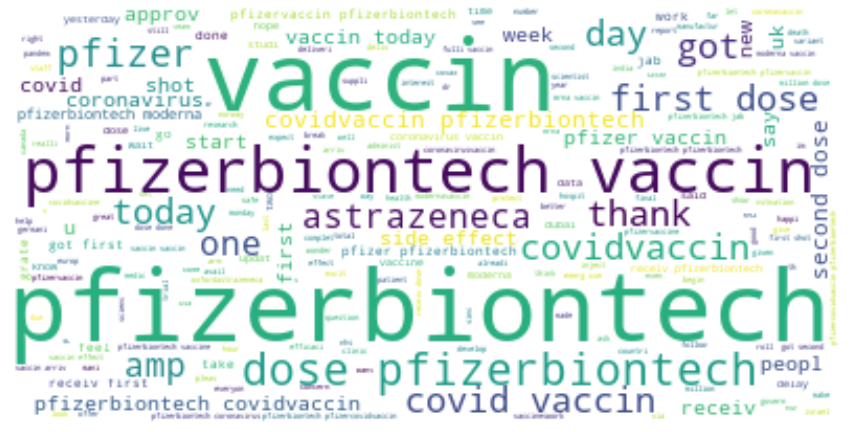

In [ ]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

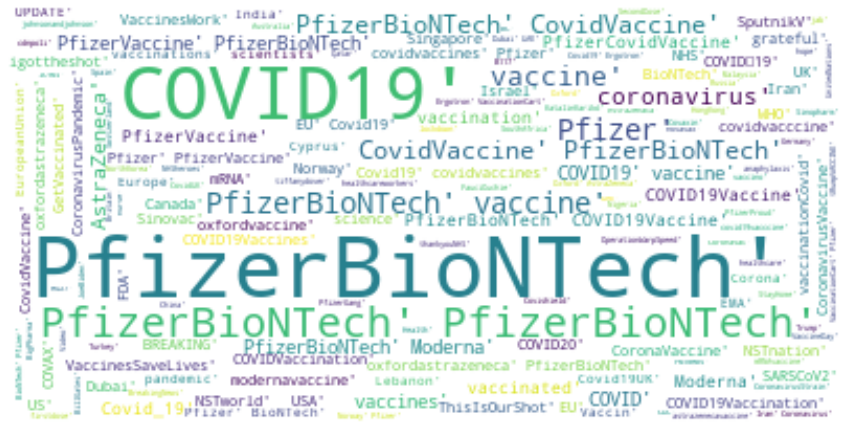

In [ ]:
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data["user_verified"].value_counts()

False    4169
True      580
Name: user_verified, dtype: int64

In [ ]:
data["text"][0]

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

                                                 text  Positive  Negative  \
0   folk said daikon past could treat cytokin stor...     0.252     0.000   
2   coronavirus sputnikv astrazeneca pfizerbiontec...     0.000     0.000   
6   bit sad claim fame success vaccin patriot comp...     0.353     0.166   
9   covidvaccin state start get  monday us say pak...     0.000     0.000   
10  death close  mark million peopl wait pfizerbio...     0.000     0.302   

    Neutral  
0     0.748  
2     1.000  
6     0.481  
9     1.000  
10    0.698  


In [ ]:
data.head()

,text,Positive,Negative,Neutral
0,folk said daikon past could treat cytokin stor...,0.252,0.000,0.748
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,0.000,1.000
6,bit sad claim fame success vaccin patriot comp...,0.353,0.166,0.481
9,covidvaccin state start get monday us say pak...,0.000,0.000,1.000
10,death close mark million peopl wait pfizerbio...,0.000,0.302,0.698


In [ ]:
i = "pfizer like"
sentiments.polarity_scores(i)["pos"]

0.714

In [ ]:
i = "pfizer like"
sentiments.polarity_scores(i)["neg"]

0.0

In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)